# Visualization for Attention Distributions within Each Head



In [1]:
%matplotlib inline
import random
import torch
import pickle
from attention_util import *
import torch.nn.functional as F

In [ ]:
SAVE_DIR = "../nlap/"
data_folder = "../../../Stanford-Sentiment-Treebank/"

In [2]:
#######################################################################
#
# Visualization for SST dataset
#
#######################################################################
# load the transformer attention to memory for all samples
id_tf_attns = pickle.load( open(SAVE_DIR + "/id_tf_attns_sst.p", "rb" ) )
id_ctx_attns = pickle.load( open(SAVE_DIR + "/id_ctx_attns_sst.p", "rb" ) )
all_sentence = pickle.load( open( data_folder + "id_sentence.p", "rb" ) )
id_labels = pickle.load( open( SAVE_DIR + "/id_labels_test_sst.p", "rb" ) )
# load token dictionary
sentece_token_rate = pickle.load( open( SAVE_DIR + "/seq_token_rate.p", "rb" ) )

In [3]:
# get sentences with length = 10 (this is easier to make good visualizations)
sentence_in_10 = []
for seq in id_tf_attns.keys():
    tf_attns = torch.FloatTensor(id_tf_attns[seq])
    sentence = all_sentence[seq]
    # input params
    tokens = tf_attns.shape[2]
    # let us skip visualization long sequence
    if tokens == 10:
        sentence_in_10.append(seq)

Words Considered: 
[1, 5]
Test Set Size: 
2210
Selected Set Size: 
844
0.07408838560440816 0.02287183969617877 0.05121654590822924
51 564 229


<IPython.core.display.Javascript object>


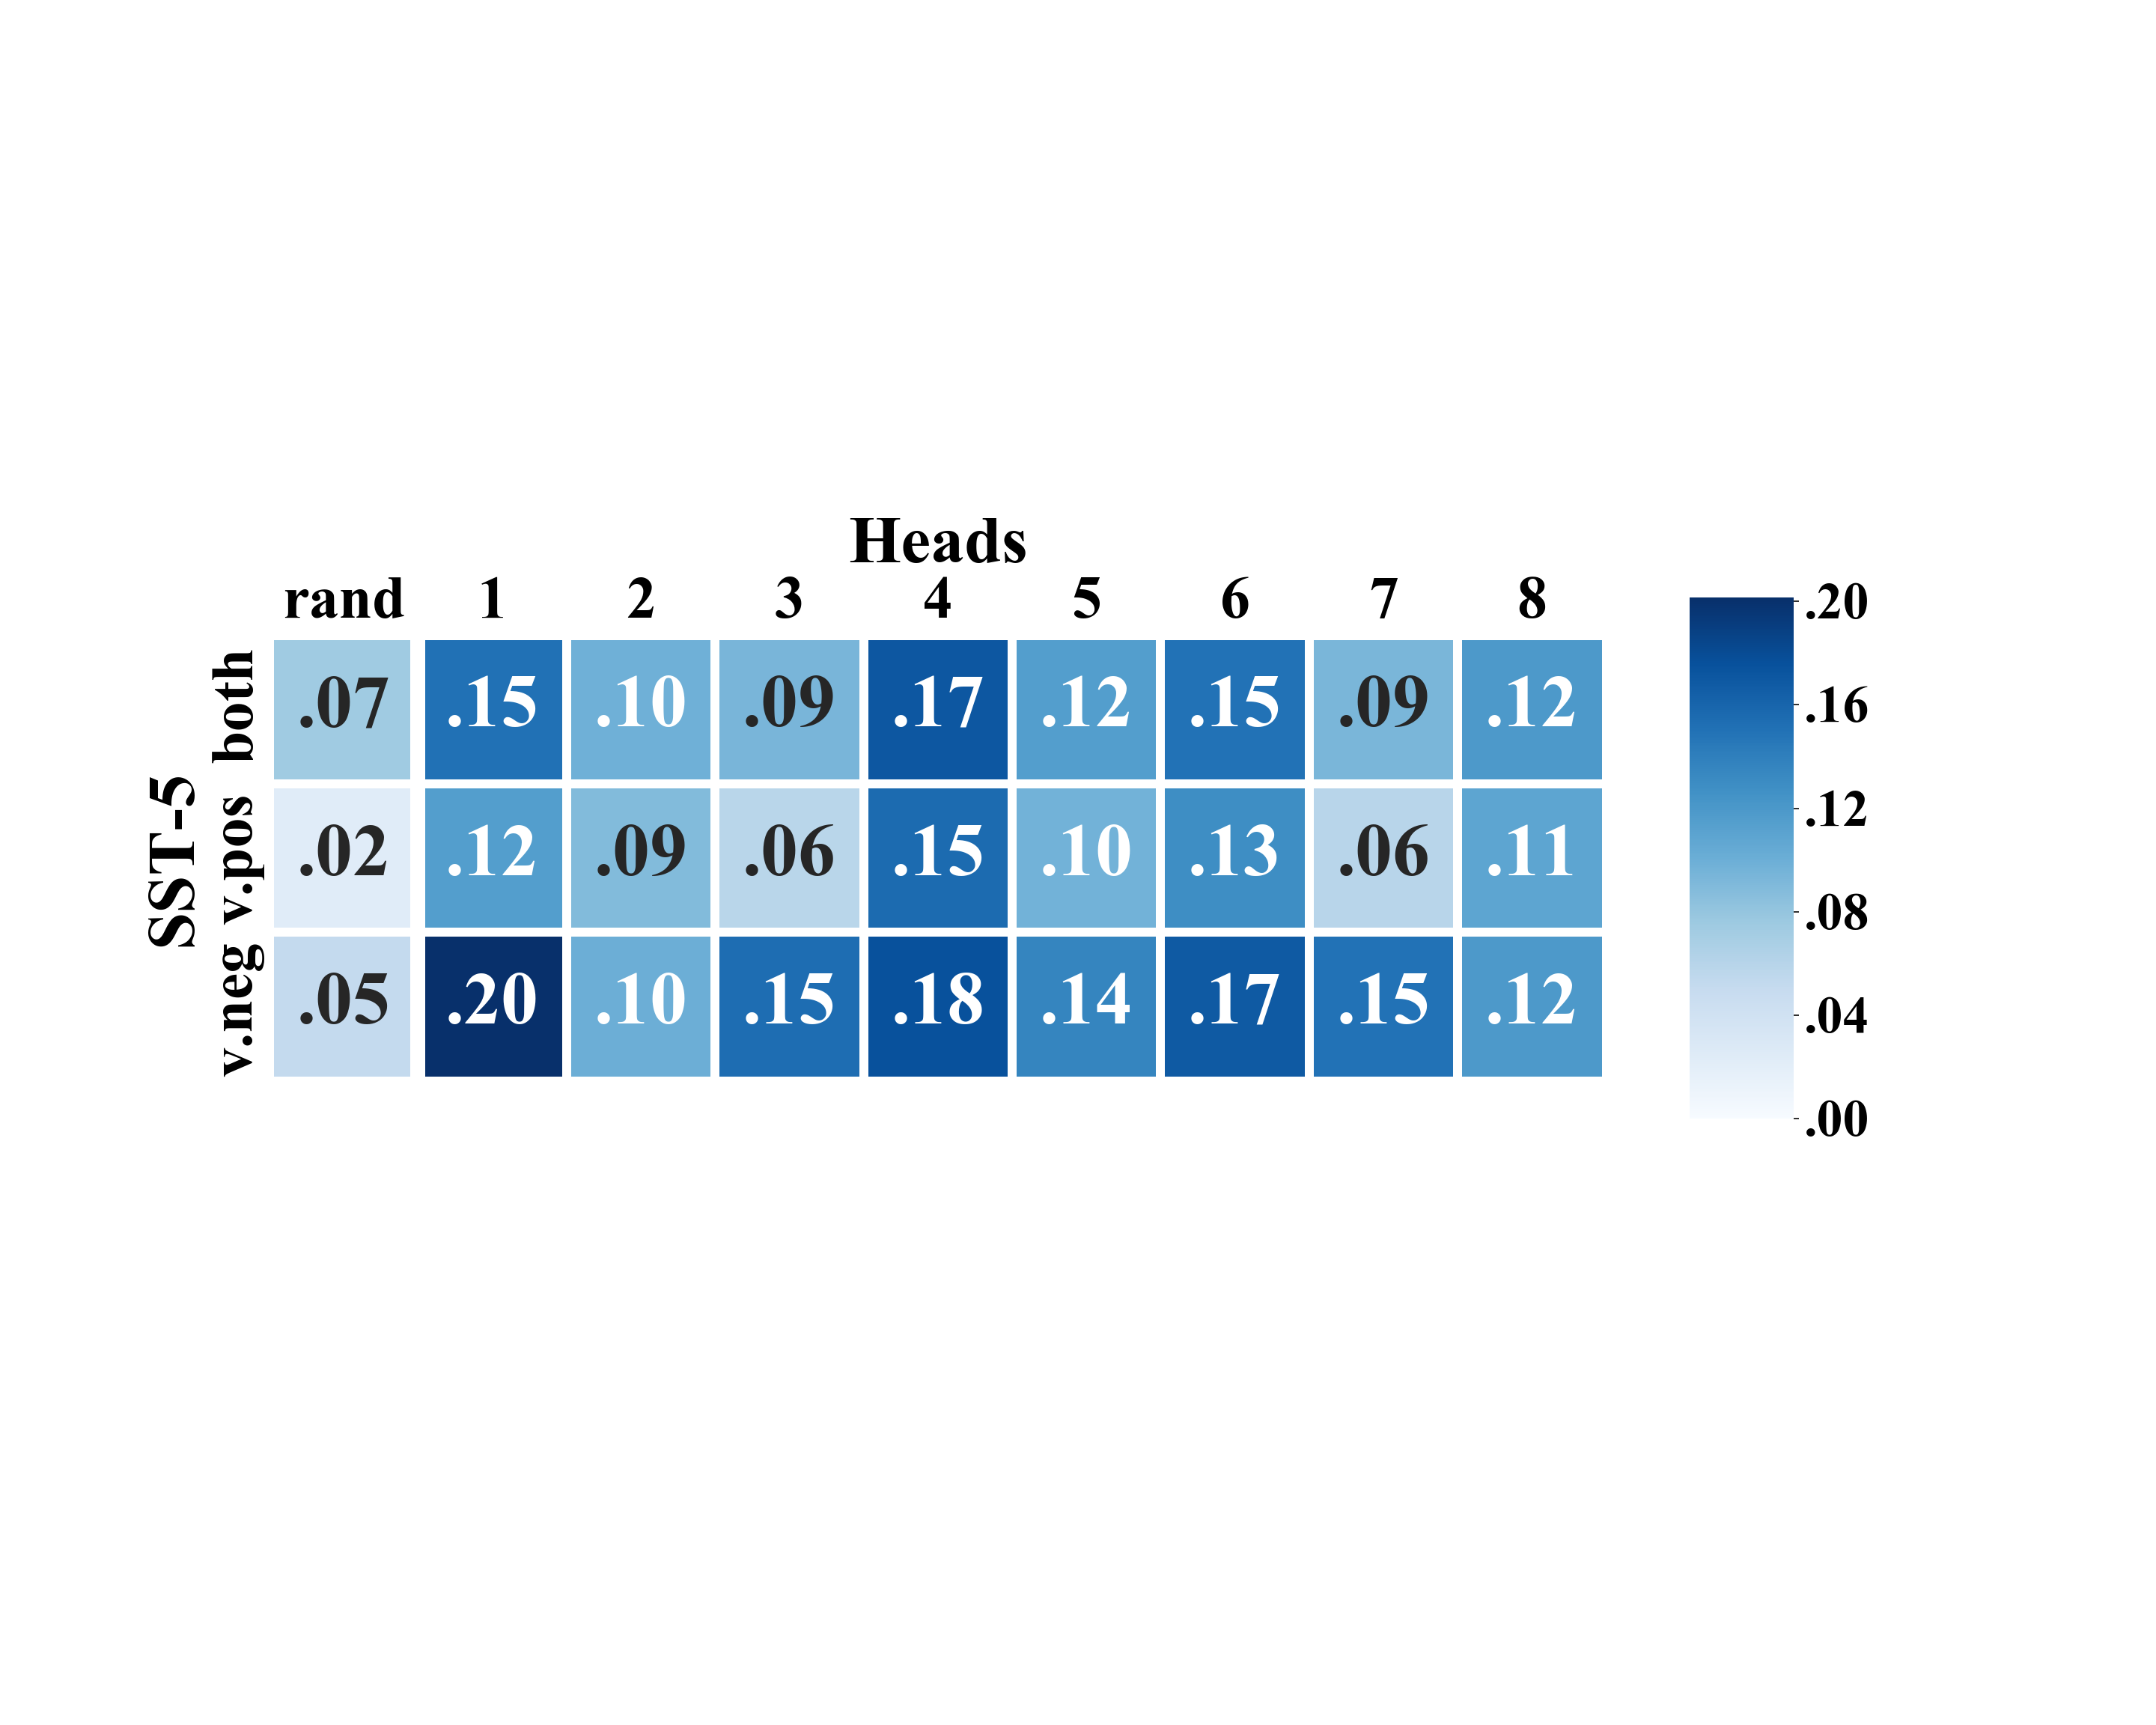

In [153]:
%matplotlib notebook
head_heatmap_viz_func(id_tf_attns, id_ctx_attns, sentece_token_rate, cmap="Blues")        

In [154]:
#######################################################################
#
# Visualization for SEND dataset
#
#######################################################################
# For SEND dataset, we dont have try labels for tokens, so we leverage
# with external dictionary
seq_sentence = pickle.load( open(SAVE_DIR + "/seq_sentences_test_send.p", "rb") )
seq_tf_attns = pickle.load( open(SAVE_DIR + "/seq_tf_attns_test_send.p", "rb") )
seq_ctx_attns = pickle.load( open(SAVE_DIR + "/seq_ctx_attns_test_send.p", "rb") )
# Using the word valence mapping from the U-shape analysis
output_file = "../warriner_valence/Test_send.csv"
dict_map = pd.read_csv(output_file)
word_list = dict_map['word']
rating_list = dict_map['warriner_valence']
dict_score = dict(zip(word_list, rating_list))

In [155]:
# To validate dict score, we simply print out some very postive and 
# very negative word to see if they make sense
postive = []
negative = []
for word in dict_score.keys():
    if dict_score[word] >= 7:
        postive.append(word)
    elif dict_score[word] < 3:
        negative.append(word)
print(postive[:10])
print(negative[:10])

['really', 'liked', 'girl', 'intelligent', 'smart', 'perfect', 'well', 'dates', 'like', 'boyfriend']
['mean', 'devastated', 'sad', 'awful', 'humiliating', 'humiliation', 'broken', 'accident', 'scared', 'tense']


In [156]:
# classify these words into 5 catogroies as in SST from Very Neg to Very Pos
# [1-3.5, X, 6.5-9], for scores falling in between, we assign them randomly

# use this step to create needed data structure to pass into visualization
# function as well.
lower_b = 3.5
upper_b = 6.5
sentence_id = 0
id_tf_attns = dict()
id_sentence = dict()
id_ctx_attns = dict()
sentece_token_rate = dict()
for seq in seq_sentence.keys():
    tf_attns = seq_tf_attns[seq]
    ctx_attns = seq_ctx_attns[seq]
    inner_window_id = 0
    for sentence in seq_sentence[seq]:     
        id_tf_attns[sentence_id] = torch.FloatTensor(tf_attns[inner_window_id])
        id_sentence[sentence_id] = sentence
        id_ctx_attns[sentence_id] = torch.FloatTensor(ctx_attns[inner_window_id])
        token_rate = []
        for word in sentence:
            if word in dict_score.keys():
                if dict_score[word] < lower_b:
                    token_rate.append(1)
                elif dict_score[word] >= upper_b:
                    token_rate.append(5)
                else:
                    token_rate.append(0)
            else:
                token_rate.append(0)
        sentece_token_rate[sentence_id] = token_rate
        inner_window_id += 1
        sentence_id += 1

Words Considered: 
[1, 5]
Test Set Size: 
1011
Selected Set Size: 
741
0.13491613296787805 0.028798505661278447 0.10611762730659956
145 502 94


<IPython.core.display.Javascript object>


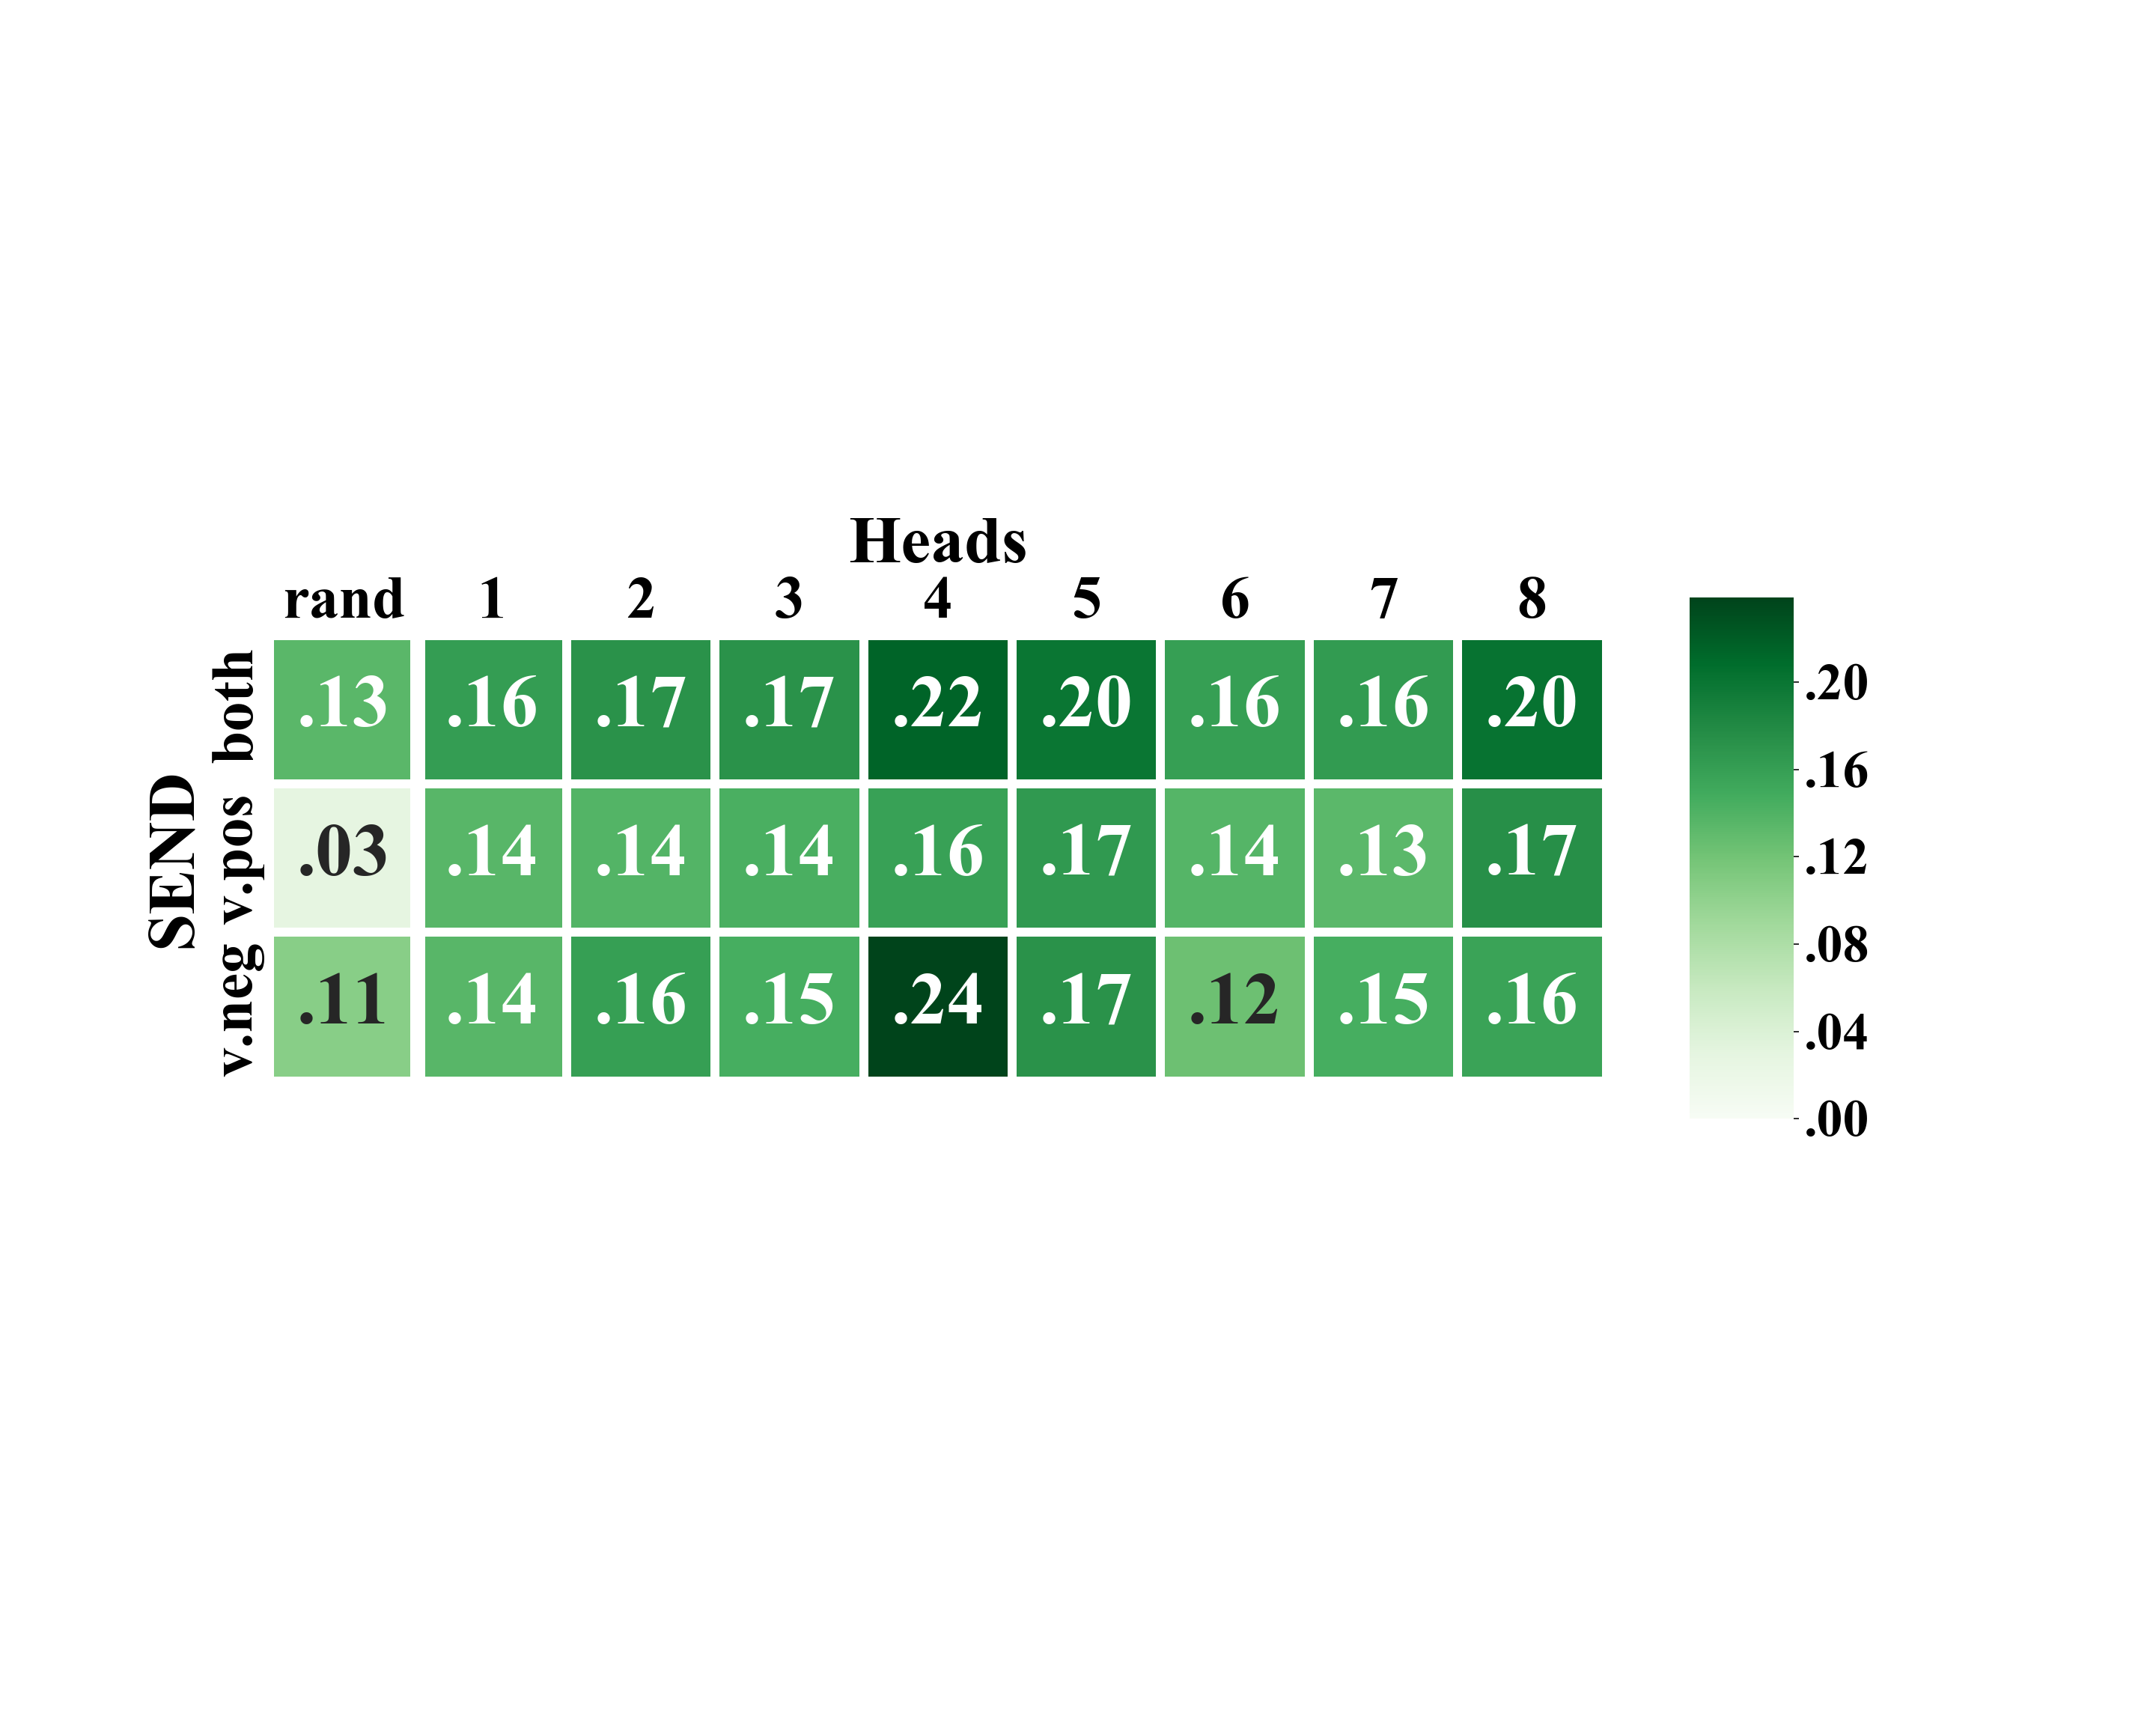

In [157]:
# Visualize for SEND!
%matplotlib notebook
head_heatmap_viz_func(id_tf_attns, id_ctx_attns, sentece_token_rate, dataset="send", cmap="Greens")  